In [1]:
%tensorflow_version 2.x  
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the dataset
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#explore the data
train_images.shape

(60000, 28, 28)

In [4]:
#look at the pixel
train_images[0,23,23]

194

In [5]:
# let's have a look at the first 10 training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

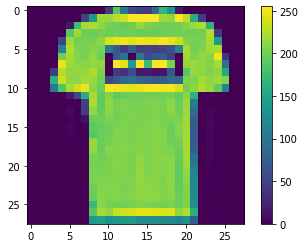

In [6]:
#plot the images
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#data preprocessing
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
#build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [9]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#train the data
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.6405 - accuracy: 0.7733


In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8512
Test accuracy: 0.8511999845504761


Ankle boot


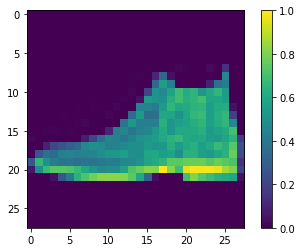

In [22]:
#make predictions
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()